In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

# Plot databases entries per databases

In [2]:
rna_inter_df = utils.load_rna_inter_csv()
rna_sequences = pd.read_parquet('rna_sequences_short', engine='pyarrow')
protein_sequences = pd.read_parquet('protein_sequences_short', engine='pyarrow')
all_df = rna_inter_df.merge(rna_sequences, on='Raw_ID1', how='inner')
all_df = all_df.merge(protein_sequences, on='Raw_ID2', how='inner')
del rna_inter_df
del rna_sequences
del protein_sequences

In [13]:
all_df['Database_1'] = all_df['Raw_ID1'].str.split(':').str[0]
all_df['Database_2'] = all_df['Raw_ID2'].str.split(':').str[0]

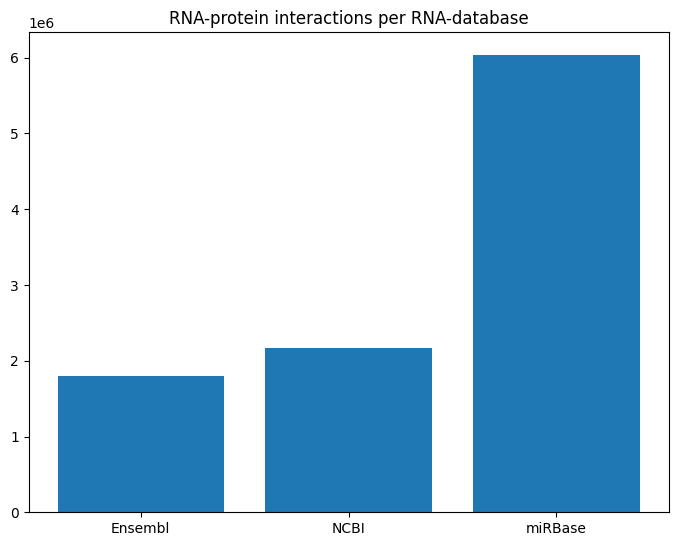

In [12]:
rna_per_db = all_df.groupby('Database_1')['Database_1'].count().reset_index(name='count')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dbs = list(rna_per_db['Database_1'])
amounts = list(rna_per_db['count'])
ax.bar(dbs,amounts)
plt.title("RNA-protein interactions per RNA-database")
plt.show()

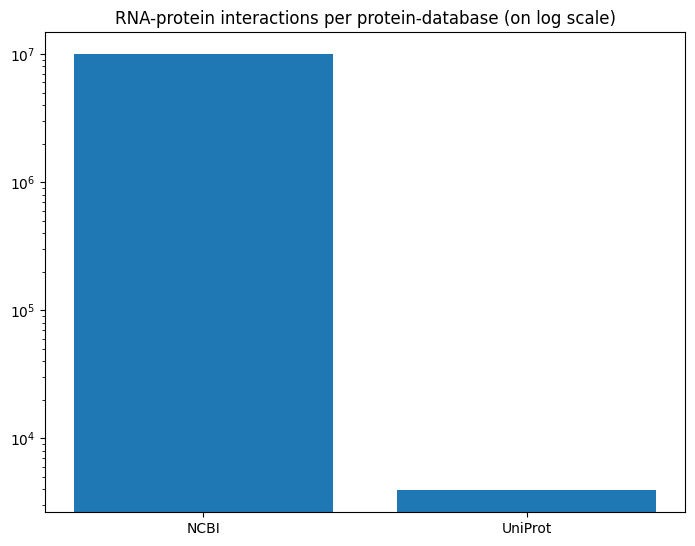

In [18]:
protein_per_db = all_df.groupby('Database_2')['Database_2'].count().reset_index(name='count')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dbs = list(protein_per_db['Database_2'])
amounts = list(protein_per_db['count'])
ax.bar(dbs,amounts)
plt.yscale('log')
plt.title("RNA-protein interactions per protein-database (on log scale)")
plt.show()

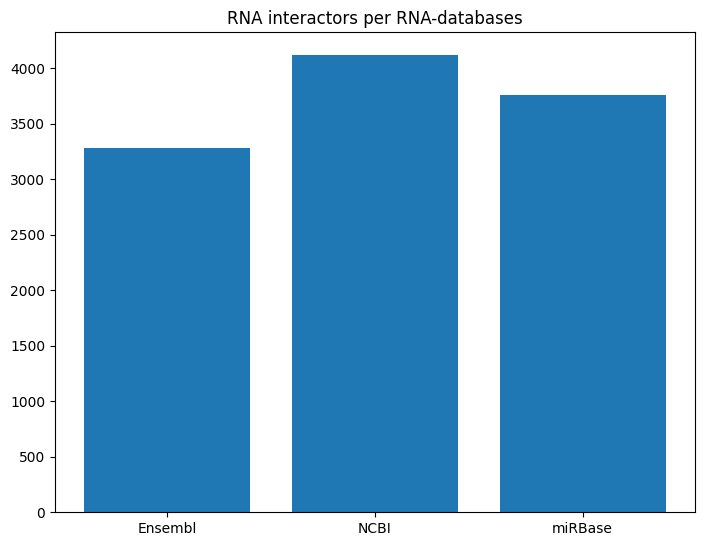

In [19]:
unique_rna_per_db = all_df.drop_duplicates(subset=['Raw_ID1']).groupby('Database_1')['Database_1'].count().reset_index(name='count')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dbs = list(unique_rna_per_db['Database_1'])
amounts = list(unique_rna_per_db['count'])
ax.bar(dbs,amounts)
plt.title("RNA interactors per RNA-databases")
plt.show()

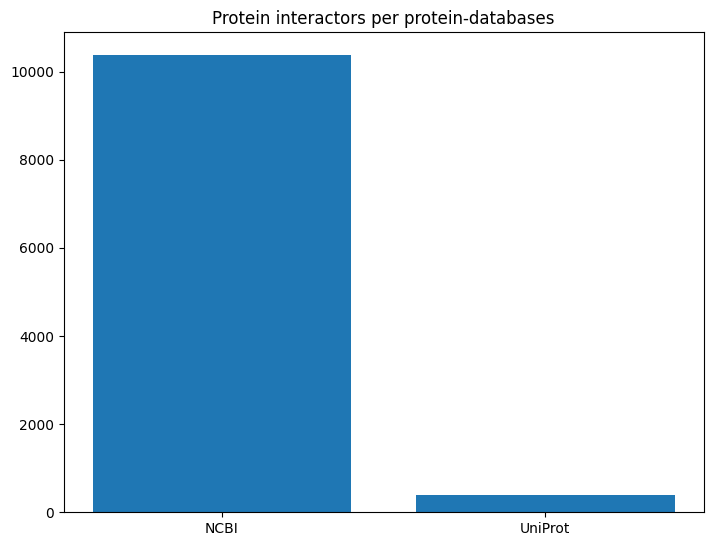

In [23]:
unique_protein_per_db = all_df.drop_duplicates(subset=['Raw_ID2']).groupby('Database_2')['Database_2'].count().reset_index(name='count')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dbs = list(unique_protein_per_db['Database_2'])
amounts = list(unique_protein_per_db['count'])
ax.bar(dbs,amounts)
plt.title("Protein interactors per protein-databases")
plt.show()

# Plot: How many protein interactions for rna sequences

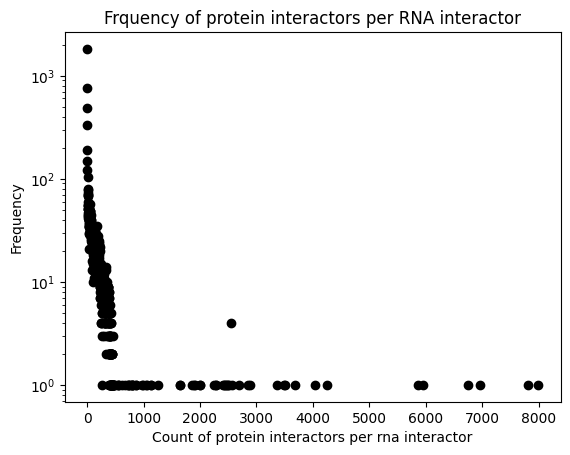

In [47]:
# rna_inter_df = utils.load_rna_inter_csv()
# rna_sequences = pd.read_parquet('rna_sequences_short', engine='pyarrow')
protein_count_frequencies = rna_inter_df.merge(rna_sequences.drop_duplicates(subset=['Raw_ID1']).loc[:, ['Raw_ID1']], on='Raw_ID1', how='inner').groupby('Raw_ID1')['Raw_ID2'].count().reset_index(name='count_proteins').groupby('count_proteins')['count_proteins'].count().reset_index(name='count_frequency')

x = list(protein_count_frequencies['count_proteins'])
y = list(protein_count_frequencies['count_frequency'])
plt.yscale('log')
plt.plot(x, y, 'o', color='black')
plt.title("Frquency of protein interactors per RNA interactor")
plt.xlabel("Count of protein interactors per rna interactor")
plt.ylabel("Frequency")
plt.show()

# Plot: How many rna interactions for protein sequences

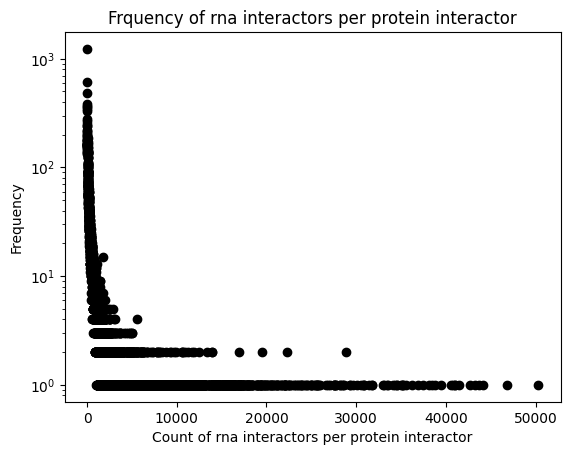

In [46]:
# rna_inter_df = utils.load_rna_inter_csv()
# protein_sequences = pd.read_parquet('protein_sequences_short', engine='pyarrow')
rna_count_frequencies = rna_inter_df.merge(protein_sequences.drop_duplicates(subset=['Raw_ID2']).loc[:, ['Raw_ID2']], on='Raw_ID2', how='inner').groupby('Raw_ID2')['Raw_ID1'].count().reset_index(name='count_rna').groupby('count_rna')['count_rna'].count().reset_index(name='count_frequency')
x = list(rna_count_frequencies['count_rna'])
y = list(rna_count_frequencies['count_frequency'])
plt.yscale('log')
plt.plot(x, y, 'o', color='black')
plt.title("Frquency of rna interactors per protein interactor")
plt.xlabel("Count of rna interactors per protein interactor")
plt.ylabel("Frequency")
plt.show()

# Plot: Interactions per RNA-type

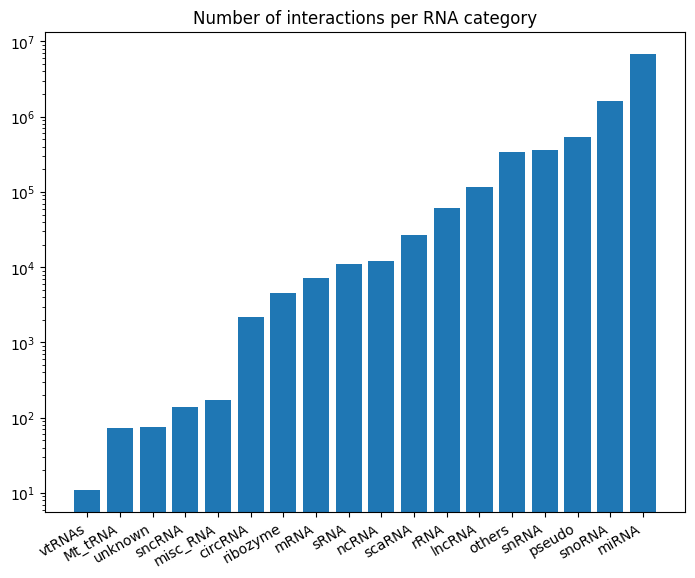

In [11]:
count_rna_categories = all_df.groupby(by='Category1')['Category1'].count().reset_index(name='count_Category1').sort_values(by='count_Category1')
x = list(count_rna_categories['Category1'])
y = list(count_rna_categories['count_Category1'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.yscale('log')
fig.autofmt_xdate()
plt.title("Number of interactions per RNA category")
plt.show()

# Plot: Interactions per protein-type

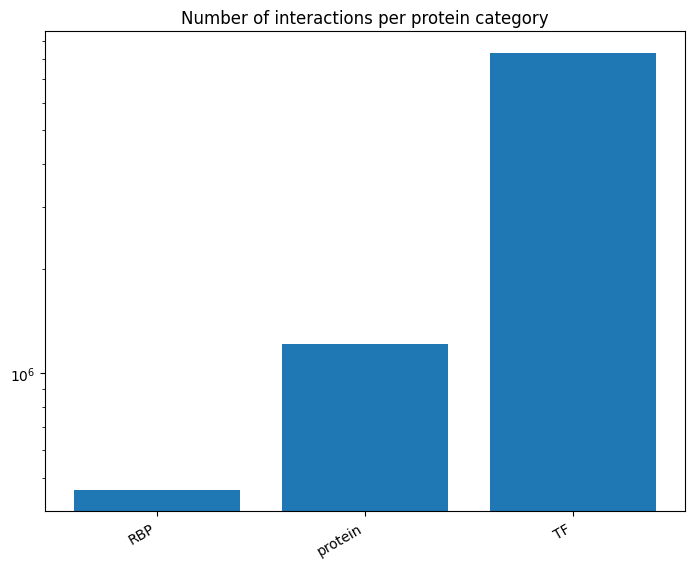

In [12]:
count_protein_categories = all_df.groupby(by='Category2')['Category2'].count().reset_index(name='count_Category2').sort_values(by='count_Category2')
x = list(count_protein_categories['Category2'])
y = list(count_protein_categories['count_Category2'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.yscale('log')
fig.autofmt_xdate()
plt.title("Number of interactions per protein category")
plt.show()

# Plot: count number of interactions pairs

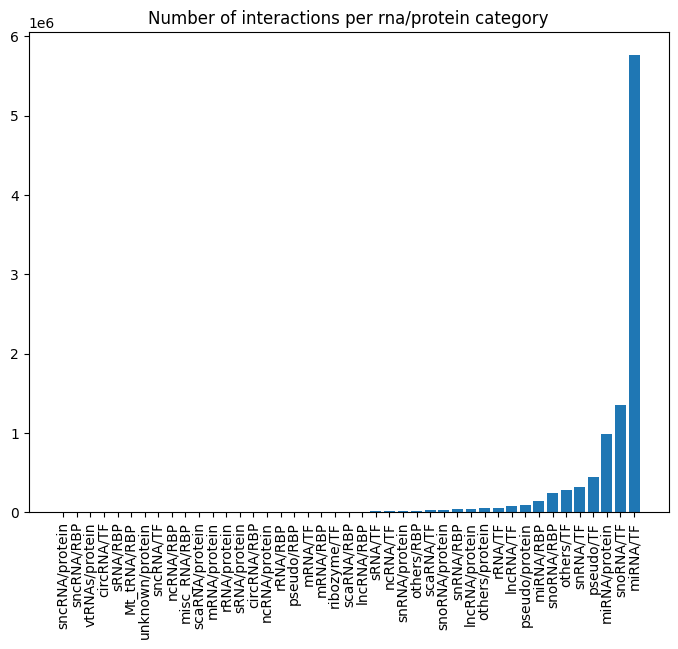

In [27]:
count_interactions_categories = all_df.groupby(by=['Category2', 'Category1']).count().reset_index(drop=False)
count_interactions_categories['combination'] = count_interactions_categories['Category1'].astype(str) + '/' + count_interactions_categories['Category2'].astype(str)
count_interactions_categories['count'] = count_interactions_categories['RNAInterID']
count_interactions_categories = count_interactions_categories[['combination', 'count']].sort_values(by='count')
x = list(count_interactions_categories['combination'])
y = list(count_interactions_categories['count'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
# plt.yscale('log')
plt.xticks(rotation=90)

plt.title("Number of interactions per rna/protein category")
plt.show()

# Plot score statistics.

In [29]:
ranges = [x / 10 for x in range(10)]
counts = {}
for value_range in ranges:
    rna_inter_df[rna_inter_df['score'] > value_range]

KeyboardInterrupt: 